In [96]:
import numpy as np
from importlib import reload
from modules.utils import area_rate

In [97]:
# Module à importer absolument
import matplotlib.pyplot as plt
import os
import datetime

In [98]:
# Données d'entrée

coordinates = np.array(([[10,24,30,56],[240,354,30,56],[10,24,30,56],[100,39,500,200], [10,24,30,56], [10,24,30,56]]))

indexes = np.array([23,45,1,1,2,3])

predictions = np.array(([0.7, 0.9, 0.4, 0.3, 0.6, 0.51]))

labels = np.array(([[23,10,24,30,56, 1],[45,24,35,30,56, 1],[23,100,240,30,56, 1], [1,10,24,30,56, 1], [2,24,35,30,56, 1], [3,24,35,30,56, 1]]))


In [99]:
# Fonction à ajouter

def get_precision_recall(coordinates, indexes, labels, predictions):

    sorted_predictions_indexes = np.argsort(predictions)[::-1]
    
    dir = "precision-recall"
    
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    
    x = []
    y = []
    
    for sorted_index in sorted_predictions_indexes:
        
        img_id = indexes[sorted_index]
        
        positive_labels = labels[labels[:,0] == img_id]
        
        face = False
        for label in positive_labels:
            
            if area_rate(label[1:5], coordinates[sorted_index]) > 0.5:
                face = True
                
        pred = predictions[sorted_index]
        
        if pred > 0.5 and face:
            true_positive += 1
        elif pred > 0.5 and not face:
            false_positive += 1
        elif pred < 0.5 and not face:
            true_negative += 1
        elif pred < 0.5 and face:
            false_negative += 1

        if true_positive+false_positive == 0:
            x.append(0)
        else:
            x.append(true_positive/(true_positive+false_positive))

        if true_positive+false_negative == 0:
            y.append(0)
        else :
            y.append(true_positive/(true_positive+false_negative))

        
            
    print("Vrai positif", true_positive)
    print("Faux positif", false_positive)
    print("Vrai négatif", true_negative)
    print("Faux négatif", false_negative)
        
    fig = plt.plot(x,y, 'ro')
    plt.title("Courbe précision / rappel ")
    plt.xlabel("Rappel")
    plt.ylabel("Précision")
    
    if not os.path.exists(dir):
        os.makedirs(dir)
    
    plt.savefig(dir + "/precision-recall-" + datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S') + ".png")

Vrai positif 1
Faux positif 3
Vrai négatif 1
Faux négatif 1


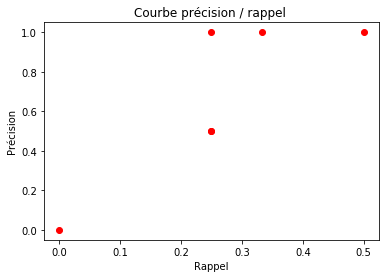

In [100]:
get_precision_recall(coordinates, indexes, labels, predictions)